# Binary On/Off State Feature

### The binary state feature converts the SFAN_dps readings into a simple 1 (on) or 0 (off) value based on whether the pressure exceeds the specified threshold 12-8

After analysis of the dataset for the minimum and maximum values need for the system to turn on and off, I found that **SFAN_dps = 12** is a good threshold to have, here I have created a  method where the system will have a deadzone between 8 and 12, which means, the SFAN_dps (system) requires 12 to be **Active** but must drop below 8 to turn off. 
since the values of the sensors fluctuate, there is a chance for instant turn on/off state which maybe considered as a noise. This hysteresis method will mitigate that proble.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


# Load Excel file
file_path = '../data/hochschule_wismar_gebaeude_001_lueftung_hoersaele_750.xlsx'
df = pd.read_excel(file_path)


# df.set_index('datetime')['SFAN_dps'].plot()
res = df.columns
print(res)

Index(['datetime', 'EFAN_dps', 'EFAN_dpw', 'EHA_t', 'ETA_co', 'ETA_rh',
       'ETA_t', 'ODA_rh', 'ODA_t', 'PHEA_rh', 'PHEA_t', 'SFAN_dps', 'SFAN_dpw',
       'SUP_rh', 'SUP_t', 'datetime.1', 'hours', 'SUP_x', 'SUP_h', 'ODA_x',
       'ODA_h', 'ETA_x', 'ETA_h', 'SFAN_v', 'EFAN_v', 'PREC_t', 'PREC_x',
       'PREC_rh', 'SUP_co', 'SFAN_efficiency_Fan', 'SFAN_l', 'SFAN_l%',
       'SFAN_efficiency_Motor', 'SFAN_efficiencyAuxillary',
       'SFAN_efficiencyOverall', 'EFAN_efficiency_Fan', 'EFAN_l', 'EFAN_l%',
       'EFAN_efficiency_Motor', 'EFAN_efficiencyAuxillary',
       'EFAN_efficiencyOverall', 'dt_fan', 'PREC_h', 'heatEnergy', 'rec_heat',
       'rec_share', 'coolingEnergy', 'reheat', 'rec_cool', 'steam',
       'rec_steam', 'rec_eff', 'heat_load', 'cool_load', 'hum_load',
       'h_energy_actual', 'aux_energy', 'f_aux', 'fan_energy_actual',
       'h_energy_final', 'e_energy_final', 'energy_costs_total', 'operational',
       'check_cool'],
      dtype='object')


In [22]:
# 1 for system on, 0 for system off

df['system_status'] = 0  


for i in range(1, len(df)):
    if df.loc[i, 'SFAN_dps'] > 12:  # Higher threshold to turn ON
        df.loc[i, 'system_status'] = 1
    elif df.loc[i, 'SFAN_dps'] < 8:  # Lower threshold to turn OFF
        df.loc[i, 'system_status'] = 0
    else:  # Keep previous state
        df.loc[i, 'system_status'] = df.loc[i-1, 'system_status']

In [23]:
res = df.columns
print(res)


Index(['datetime', 'EFAN_dps', 'EFAN_dpw', 'EHA_t', 'ETA_co', 'ETA_rh',
       'ETA_t', 'ODA_rh', 'ODA_t', 'PHEA_rh', 'PHEA_t', 'SFAN_dps', 'SFAN_dpw',
       'SUP_rh', 'SUP_t', 'datetime.1', 'hours', 'SUP_x', 'SUP_h', 'ODA_x',
       'ODA_h', 'ETA_x', 'ETA_h', 'SFAN_v', 'EFAN_v', 'PREC_t', 'PREC_x',
       'PREC_rh', 'SUP_co', 'SFAN_efficiency_Fan', 'SFAN_l', 'SFAN_l%',
       'SFAN_efficiency_Motor', 'SFAN_efficiencyAuxillary',
       'SFAN_efficiencyOverall', 'EFAN_efficiency_Fan', 'EFAN_l', 'EFAN_l%',
       'EFAN_efficiency_Motor', 'EFAN_efficiencyAuxillary',
       'EFAN_efficiencyOverall', 'dt_fan', 'PREC_h', 'heatEnergy', 'rec_heat',
       'rec_share', 'coolingEnergy', 'reheat', 'rec_cool', 'steam',
       'rec_steam', 'rec_eff', 'heat_load', 'cool_load', 'hum_load',
       'h_energy_actual', 'aux_energy', 'f_aux', 'fan_energy_actual',
       'h_energy_final', 'e_energy_final', 'energy_costs_total', 'operational',
       'check_cool', 'system_status'],
      dtype='object')


In [24]:
# Ensure datetime column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Define time window on 2023-05-26
start = pd.to_datetime('2023-05-26 12:00:00')
end = pd.to_datetime('2023-05-26 18:00:00')

# Filter for the time window
afternoon_df = df[(df['datetime'] >= start) & (df['datetime'] < end)]

# Show relevant columns
print(afternoon_df[['datetime', 'SFAN_dps', 'system_status']])



               datetime   SFAN_dps  system_status
299 2023-05-26 12:00:00  61.519259              1
300 2023-05-26 12:15:00  61.197255              1
301 2023-05-26 12:30:00  61.463750              1
302 2023-05-26 12:45:00  62.526042              1
303 2023-05-26 13:00:00  62.164902              1
304 2023-05-26 13:15:00  62.312708              1
305 2023-05-26 13:30:00  61.373333              1
306 2023-05-26 13:45:00  61.773333              1
307 2023-05-26 14:00:00  62.333333              1
308 2023-05-26 14:15:00  63.000000              1
309 2023-05-26 14:30:00  63.333333              1
310 2023-05-26 14:45:00  63.161111              1
311 2023-05-26 15:00:00  62.838889              1
312 2023-05-26 15:15:00  62.838317              1
313 2023-05-26 15:30:00  62.494444              1
314 2023-05-26 15:45:00  62.505556              1
315 2023-05-26 16:00:00  10.677778              1
316 2023-05-26 16:15:00   0.000000              0
317 2023-05-26 16:30:00   0.000000              0


# Day light saving check feature engineering.

**Daylight Savings Time (DST) in Germany:**

Starts: Last Sunday of March (2:00 AM → 3:00 AM)

Ends: Last Sunday of October (3:00 AM → 2:00 AM)

### I used a library in python called pytz which localizes the naive timestamps to local timestamps. for eg: berlin. in our case.


then I am checking if there is any difference between the naive timestamp with the local time, there should be a difference of 1 hour for day light saving and that is how I am labeling the timestamps. I also changed it from boolean inputs to binary, as ML prefers binary over boolean values.  **The column name for the daylight saving status is "is_dst"**

this approach is chosen because in the future, the timezones may be selected by the user for better code usability rather than hard coding it. 

### **problems faced**

**DST End Transition:**

October 29, 2023, 03:00 CEST → 02:00 CET

Creates two 02:00:00 timestamps (one DST, one not)

**Solution**

Kept the original datestamp as the index for the other features, and **created a new column called datetime_berlin** that localizes the naive timestamp. the reason behind creating another datestamp for Day light saving is because, it creates a duplicate value of the original datetime stamp on the day the daylight saving is turned off. This creates  two 02:00:00 timestamps (one DST, one not). that hampers the rest of the features which uses the original timestamp for the indedx. 

To tackle the creation of a duplicate timestamp during the transition of DST, I have deceided to use the value of the previous state, as this change happens during the night, it does not effect the functionality of the values, as the value for SFAN_dps is = 0 at that hour of the night. 




In [25]:
import pandas as pd

# # 1. Load your HVAC data
# df = pd.read_excel('../data/hochschule_wismar_gebaeude_001_lueftung_hoersaele_750.xlsx')

# 2. Convert to datetime and set as index
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

# 3. Create timezone-aware copy
df['datetime_berlin'] = (
    df.index
    .tz_localize('Europe/Berlin',
                ambiguous=False,
                nonexistent='shift_forward')
)

# 4. Correct DST flag calculation (fixed)
df['is_dst'] = df['datetime_berlin'].apply(
    lambda x: int(x.dst().total_seconds() > 0) if pd.notnull(x) else 0
)

# 5. Verification
print("DST flag counts:")
print(df['is_dst'].value_counts())

print("\n DST Transition Example:")
print(df.loc['2023-10-29 01:00':'2023-10-29 03:00'][['datetime_berlin', 'is_dst']])

DST flag counts:
is_dst
1    35395
0    28749
Name: count, dtype: int64

 DST Transition Example:
                              datetime_berlin  is_dst
datetime                                             
2023-10-29 01:00:00 2023-10-29 01:00:00+02:00       1
2023-10-29 01:15:00 2023-10-29 01:15:00+02:00       1
2023-10-29 01:30:00 2023-10-29 01:30:00+02:00       1
2023-10-29 01:45:00 2023-10-29 01:45:00+02:00       1
2023-10-29 02:00:00 2023-10-29 02:00:00+01:00       0
2023-10-29 02:15:00 2023-10-29 02:15:00+01:00       0
2023-10-29 02:30:00 2023-10-29 02:30:00+01:00       0
2023-10-29 02:45:00 2023-10-29 02:45:00+01:00       0
2023-10-29 03:00:00 2023-10-29 03:00:00+01:00       0


In [26]:
res = df.columns
print(res)

Index(['EFAN_dps', 'EFAN_dpw', 'EHA_t', 'ETA_co', 'ETA_rh', 'ETA_t', 'ODA_rh',
       'ODA_t', 'PHEA_rh', 'PHEA_t', 'SFAN_dps', 'SFAN_dpw', 'SUP_rh', 'SUP_t',
       'datetime.1', 'hours', 'SUP_x', 'SUP_h', 'ODA_x', 'ODA_h', 'ETA_x',
       'ETA_h', 'SFAN_v', 'EFAN_v', 'PREC_t', 'PREC_x', 'PREC_rh', 'SUP_co',
       'SFAN_efficiency_Fan', 'SFAN_l', 'SFAN_l%', 'SFAN_efficiency_Motor',
       'SFAN_efficiencyAuxillary', 'SFAN_efficiencyOverall',
       'EFAN_efficiency_Fan', 'EFAN_l', 'EFAN_l%', 'EFAN_efficiency_Motor',
       'EFAN_efficiencyAuxillary', 'EFAN_efficiencyOverall', 'dt_fan',
       'PREC_h', 'heatEnergy', 'rec_heat', 'rec_share', 'coolingEnergy',
       'reheat', 'rec_cool', 'steam', 'rec_steam', 'rec_eff', 'heat_load',
       'cool_load', 'hum_load', 'h_energy_actual', 'aux_energy', 'f_aux',
       'fan_energy_actual', 'h_energy_final', 'e_energy_final',
       'energy_costs_total', 'operational', 'check_cool', 'system_status',
       'datetime_berlin', 'is_dst'],
      d

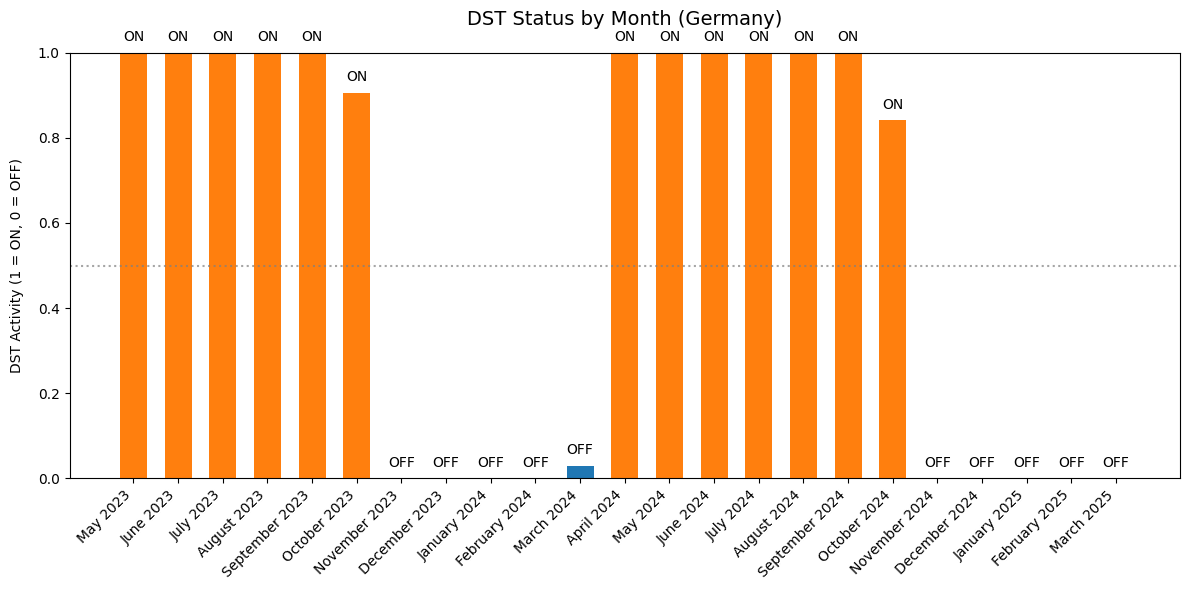

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Aggregate DST status by month
monthly_dst = (
    df.set_index('datetime_berlin')['is_dst']
    .resample('ME')
    .mean()  # % of time in DST each month
    .reset_index()
)

# 2. Extract month and year names
monthly_dst['month'] = monthly_dst['datetime_berlin'].dt.month_name()
monthly_dst['year'] = monthly_dst['datetime_berlin'].dt.year.astype(str)

# 3. Create the visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(
    monthly_dst['month'] + ' ' + monthly_dst['year'],
    monthly_dst['is_dst'],
    color=['#ff7f0e' if x > 0.5 else '#1f77b4' for x in monthly_dst['is_dst']],
    width=0.6
)

# 4. Customize the plot
plt.title('DST Status by Month (Germany)', pad=20, fontsize=14)
plt.ylabel('DST Activity (1 = ON, 0 = OFF)', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add horizontal line at 50%
plt.axhline(0.5, color='gray', linestyle=':', alpha=0.7)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.02,
        'ON' if height > 0.5 else 'OFF',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()